## airbus dataset class usage demo
before start, make sure you add the pkg root path to use relative import  
simply import mmdet library wont work, because you can't make changes, they're all under ./build directory as private now

In [58]:
import sys
sys.path.append('/Users/shengmiw/workspace/mmdetection/mmdet')

***logging will not work, so make sure you use print() instead***

In [ ]:
%load_ext autoreload
%autoreload 2
from datasets.airbus import AirbusKaggle
import logging
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

logger.info("hello")

In [63]:
# there're 150000 empty images
data_root = '/Users/shengmiw/Downloads/airbus'
img_norm_cfg = dict(mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
ds = AirbusKaggle(img_scale=(1333, 800),    
        data_root=data_root,  
        img_norm_cfg=img_norm_cfg,
        size_divisor=32,
        flip_ratio=0.5)

Train images are like:  ['00003e153.jpg', '0001124c7.jpg', '000155de5.jpg', '000194a2d.jpg', '0001b1832.jpg', '00021ddc3.jpg', '0002756f7.jpg', '0002d0f32.jpg', '000303d4d.jpg', '00031f145.jpg']
Image Count before filtering:  192556
Image Count after filtering:  42556
Airbus Dataset Summary 
	test_mode: False 
	img_norm_cfg: {'mean': [123.675, 116.28, 103.53], 'std': [58.395, 57.12, 57.375], 'to_rgb': True} 
	size_divisor: 32 
	flip_ratio: 0.5 
	image_scales: [(1333, 800)] 



In [81]:
sample1 = ds[2]

In [82]:
img = sample1['img']
img = img.transpose((1,2,0))
img.shape

(800, 800, 3)

In [83]:
import matplotlib.pyplot as plt


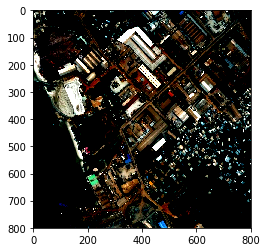

In [84]:
plt.imshow(img)
plt.show()

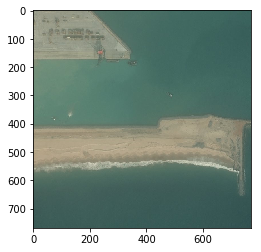

In [85]:
import matplotlib.image as mpimg
image = mpimg.imread("/Users/shengmiw/Downloads/airbus/train_v2/000194a2d.jpg")
plt.imshow(image)
plt.show()


In [87]:
sample1.keys()

dict_keys(['img', 'img_meta', 'gt_bboxes', 'gt_labels', 'gt_masks'])

In [88]:
sample1['img_meta']

{'ori_shape': (768, 768, 3),
 'img_shape': (800, 800, 3),
 'pad_shape': (800, 800, 3),
 'scale_factor': 1.0416666666666667,
 'flip': False}

In [89]:
sample1['gt_bboxes']

DataContainer(tensor([[188.5417, 655.2083, 194.7917, 664.5833],
        [203.1250, 688.5417, 209.3750, 692.7083],
        [100.0000, 734.3750, 126.0417, 750.0000],
        [128.1250, 762.5000, 185.4167, 800.0000]], dtype=torch.float64))

In [90]:
sample1['gt_labels']

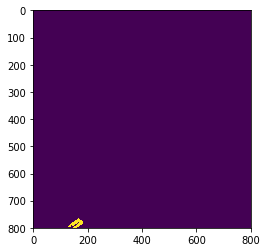

In [91]:
ms = sample1['gt_masks']
sample_mask = ms.data[3]
plt.imshow(sample_mask)
plt.show()

In [98]:
from datasets.coco import CocoDataset

In [104]:
data_root = '/Users/shengmiw/workspace/mmdetection/data/coco/'
ds_val = CocoDataset(ann_file=data_root + 'annotations/instances_val2017.json',
        img_prefix=data_root + 'val2017/',
        img_scale=(1333, 800),
        img_norm_cfg=img_norm_cfg,
        size_divisor=32,
        flip_ratio=0.5,
        with_mask=True,
        with_crowd=True,
        with_label=True)

loading annotations into memory...
Done (t=1.20s)
creating index...
index created!


In [105]:
sample1 = ds_val[1]

In [107]:
sample1.keys()

dict_keys(['img', 'img_meta', 'gt_bboxes', 'gt_labels', 'gt_bboxes_ignore', 'gt_masks'])

(800, 1088, 3)


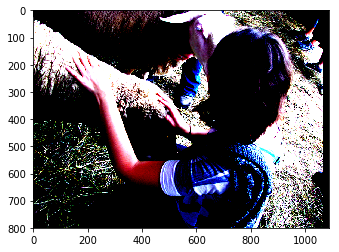

In [118]:
img = sample1['img'].data.numpy().transpose((1,2,0))
print(img.shape)
plt.imshow(img)
plt.show()

In [119]:
sample1['img_meta']

DataContainer({'ori_shape': (480, 640, 3), 'img_shape': (800, 1067, 3), 'pad_shape': (800, 1088, 3), 'scale_factor': 1.6666666666666667, 'flip': False})

In [120]:
labels = sample1['gt_labels']

DataContainer(tensor([19, 19,  1,  1,  1,  1]))

In [124]:
msk = sample1['gt_masks'].data
print('masks shape: ', msk.shape)

masks shape:  (6, 800, 1088)


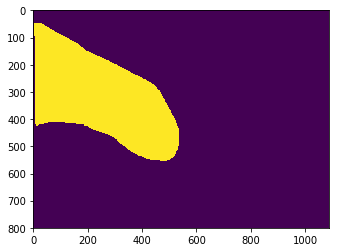

In [126]:
msk1 = msk[0]
plt.imshow(msk1)
plt.show()

In [ ]:
bboxes = sample1['gt_masks']